In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In [34]:
# Load the myopia dataset and read the csv file into a Pandas DataFrame
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [35]:
# Review the column names
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [36]:
# Remove the "MYOPIC" column from the dataset.
# Note: the target column is needed for supervised machine learning, but it will make an 
# unsupervised model biased. The target column is effectively providing clusters already.

myopia_df = myopia_df.drop(columns=["MYOPIC"])
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [37]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
                                                'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])
print(scaled_data[0:10])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]
 [-0.42021911  1.50779097 -0.5249931  -1.54047905  0.0942193  -0.02528499
  -0.2453042   1.04507157 -0.03443904 -0.22140908  1

In [38]:
# A list of the columns from the original DataFrame
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [39]:
# Create a DataFrame with the transformed data
new_myopia_df = pd.DataFrame(scaled_data, columns=myopia_df.columns)
new_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Part 2: Apply Dimensionality Reduction

In [40]:
# Initialize PCA model. Preserve 90% of the explained variance in dimensionality reduction.
# pca = PCA(n_components=0.9)
pca = PCA(n_components=6)

myopia_pca = pca.fit_transform(new_myopia_df)

In [41]:
# Transform PCA data into a new dataframe
myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["1", "2", "3", "4", "5", "6"]
)
myopia_pca.head()

,1,2,3,4,5,6
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956


In [42]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878])

### How did the number of the features change?
The algorithm actually constructs a new set of properties based on a combination of the old 
ones. PCA used the variance of each feature in order to maximize separability. This reduces 
the complexity of the model.

In [43]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [44]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

c:\Users\chris\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [45]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [46]:
# Prepare to plot the dataset

# The first column of transformed features
myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca['y'] = tsne_features[:,1]

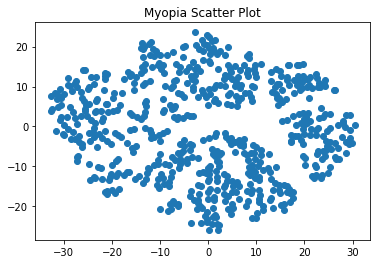

In [49]:
# Visualize the clusters
plt.scatter(myopia_pca['x'], myopia_pca['y'])
plt.title("Myopia Scatter Plot")
plt.show()

### Are there disctint clusters in the scatter plot? 
There are some distinct clusters but there is also alot of data that plots all over the chart. 
I would not classify it as all distictly clustered.

## Part 3: Perform a Cluster Analysis with K-means

c:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


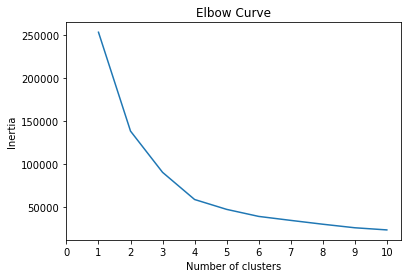

In [50]:
# Create an elbow plot to identify the best number of clusters, using a for loop to detmine the inertia
# for each k between 1 through 10.

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Part 4: Make a Recommendation
Can the patients be clustered?
Based on the amount of data used, it would be difficult to cluster the patients. There were not 
distinct clusters shown when using the t-SNE model. The elbow curve chart was also not very distinct. It is more rounded than elbow shaped. This would not provide accurate information the supervisors are looking for.
